# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 9</span>


## <font color="darkorange"> Note teoriche
Un modo interessante per risolvere problemi di ottimizzazione è dato dagli **algoritmi genetici**, i quali si ispirano ai meccanismi di evoluzione biologica, in particolare alla selezione naturale e all'adattamento delle specie. 

Gli algoritmi genetici si basano su meccanismi che emulano il processo di **selezione naturale**. Vengono analizzate tutte le possibili combinazioni genetiche, che rappresentano le soluzioni candidate al problema di ottimizzazione da risolvere.
Viene quindi simulato il processo evolutivo, ricercando e mantenendo nel tempo le soluzioni più adatte alla sopravvivenza e alla riproduzione, ovvero quelle con una maggiore "qualità" secondo la funzione obiettivo del problema. Questo adattamento dipende non solo da quanto efficacemente una soluzione si adatta all’ambiente (cioè al problema), ma anche dalla sua capacità di competere e cooperare con le altre soluzioni nella popolazione. L’obiettivo degli algoritmi genetici è quello di migliorare progressivamente, in modo iterativo, la qualità delle soluzioni, fino a raggiungere quelle ottimali anche in spazi di ricerca molto ampi e complessi, dove i metodi di ottimizzazione tradizionali risultano spesso inefficaci.

I principi dell'evoluzione sono molto semplci: le specie evolvono a causa di mutazioni casuali del loro materiale genetico. La "**sopravvivenza del più adatto**", postulato della selezione naturale, fa si che solo gli individui ottimali sopravvivano all'evoluzione, in modo che possano riprodursi e trasmettere il proprio materiale gentico alle generazioni future. Con individui ottimali si intendono quelli che possiedono tratti che li rendono più adatti all'ambiente in cui vivono. Chiaramente i criteri di selezione variano nel tempo, renendo l'evoluzione un processo molto dinamico. 

Gli algoritmo genetici implementano automaticamente i due apsetti fondamentali di un problema di ottimizzazione:
- **intensificazione**: concentrare la ricerca nelle regioni più promettenti dello spazio delle soluzioni, al fine di avvicinarsi sempre di più all'optimum. Effettivamente la selezione naturale favorisce la sopravvivenza del più adatto;
- **diversificazione**: mantenere una certa variabilità nello spazio delle soluzioni esplorate, al fine di scoprirne nuove più promettenti ed evitare di rimanere bloccati in configurazioni metastabili di minimo locale. L'algoritmo genetico relizza questo analizzando tutte le innumerevoli specie possibili.

Gli algoritmi genetici differiscono dall'ottimizzazioni standard per quattro motivi:
- non lavorano direttamente sui parametri da minimizzare, ma su una loro rappresentazione codificata;
- lavorano su un set di possibili soluzioni, non su una singola;
- sfruttano direttamente la funzione di costo, non le sue derivate;
- le mosse dell'algoritmo sono determinate in modo probabilistico, non deterministico.

Per soddisfare tali caratteristiche, un algoritmo genetico deve essere costruito tenendo conto che i parametri variazionali devono essere opportunamente codificati. Le strutture che vengono implementate sono:
- **cromosoma**: soluzione candidata, rappresentata in forma codificata (ad esempio una stringa binaria finita, un vettore finito di numeri reali, o un opportuno contenitore costruito ad hoc per la programmazione genetica);
- **popolazione**: famiglia di cromosomi;
- **geni**: componenti del cromosoma;
- **alleli**: possibili forme del gene, cioè i valori che questo può assumere.
  
Accanto a tali strutture, è necessario implementare i metodi che simulano il processi di adattamento e selezione naturale, in particolare:
- **selezione**: è il processo che, sulla base di un opportuna funzione di fitness, permette di scegliere gli individui più adatti alla riproduzione, valutando la bontà delle soluzioni ad essi associate. Maggiore è la fitness del cromosoma, tanto è più probabile che venga selezionato per la riproduzione. Tale processo è probabilistico: anche se una soluzione non è perfetta può essere comunque scelta per la riproduzione;
- **crossover**: una volta scelti i cromosomi che andranno incontro a riproduzione, questi si scambiano il materiale genetico. Si sceglie casualmente un punto di taglio (crossover point) all'interno della sequenza genetica. I due cromosomi genitori generano così due figli scambiandosi le porzioni di geni a partire da quel punto: la prima parte di ciascun figlio proviene da un genitore, e la seconda dall’altro;
- **mutazione**: alcuni geni, scelti randomicamente, variano il proprio valore in maniera casuale. Questo permette di aggiungere variabilità alle soluzioni esplorate, evitando la stagnazione in optimum locali.

Si noti che sia mutazioni sia crossover distruggono soluzioni, tra le quali potrebbe comparire anche la migliore possibile.

Il funzionamento dell'algoritmo si può schematizzare come segue:
1. viene inizializzata una popolazione di $n$ cromosomi da $l$ geni ciascuno, i quali rappresentano soluzioni canditate al problema da ottimizzare;
2. si definisce una funzione di fitness e la si calcola per ciascun cromosoma della popolazione;
3. si crea una nuova popolazione di $n$ elementi applicando i metodi che simulano la selezioni naturale:
    - si selezionano due individui nella popolazione corrente. L'algoritmo di selezione deve essere tale da favorire la scelta degli individui migliori, cioè la probabilità di selezione deve crescere con la funzione di fitness;
    - il crossover si verifica con probabilità $P_c$, è porta alla creazione di due cromosomi figli. Se non dovesse verificarsi, i figli sono dati da copie esatte due genitori;
    - si applicano mutazioni, con probabilità $P_m$, ai figli;
5. i figli sono inseriti nella nuova popolazione;
6. gli step sono iterati finchè non si genera una nuova popolazione che sostituisce la precedente.

La creazione della nuova popolazione pùò avvenire secondo diverse modalità: la vecchia popolazione può essere sostituita per intero, possono essere sostituiti solo alcuni elementi, oppure si può scegliere di applicare l'**elitismo**, cioè trasmettere gli individui migliori della popolazione alla successiva, lasciandoli invariati.

Ogni esecuzione del processo evolutivo definisce una **generazione**, al termine della quale nella popolazione compariranno più cromosomi ad alta fitness. 

Si può dimostrare che, negli algoritmi genetici, le soluzioni migliori tendono a emergere dalla combinazione di sotto-sequenze genetiche che, se presenti in un individuo, tendono ad aumentarne la fitness. Quindi, gli individui che le presentano hanno maggiori probabilità di essere selezionati e trasmetterle alle generazioni successive.

---

### Teoria degli schemi e building blocks
Uno **schema** $H$ è una classe di equivalenza di cromosomi. Rappresenta un insieme di cromosomi che condividono una certa struttura, cioè un certo numero di geni. Uno schema è definito tramite un **template**, costituito da geni fissi che assumono valor $0$ o $1$, e da $*$, chiamate **wildcards**, cioè i geni che possono assumere valori "liberi". I cromosomi che soddisfano la struttura dello schema, indipendentemente dai valori nelle wildcards, sono dette **istanze dello schema**.

Si definisce **ordine di uno schema** $o(H)$ il numero di geni definiti (cioè diversi da $*$). La distanza tra i due geni definiti più esterni nello schema è detta **lunghezza definente** $d(H)$.

Gli schemi sono le strutture manipolate dell'algoritmo genetico durante la sua esecuzione attraverso selezione, crossover e mutazione. Ogni cromosoma di lunghezza $l$ è istanza di $2^l$ schemi. In una popolazione di $n$ cromosomi sono contenute istanze di un numero di schemi distinti che va da $2^l$ (se i cromosomi sono tutti uguali) a $n \cdot 2^l$ (se i cromosomi sono tutti diversi). Per cui in verità, anche se l'algoritmo genetico valuta esplicitamente solo $n$ cromosomi, ognuno di questi è istanza di molti schemi possibili. Dunque, vengono raccolte informazioni sulla fitness media di molti schemi contemporaneamente. Questo fenomeno prende il nome di **parallelismo implicito** dell'algoritmo genetico.

Siano $H$ uno schema e $N(H, t)$ il numero di istanze dello schema $H$ nella popolazione al tempo $t$. Sia $F(H, t)$ la fitness $f$ media osservata dello schema $H$ al tempo $t$, cioè:

$$
F(H, t) = \frac{1}{N(H, t)} \sum_{x_j \in H} f(x_j) \quad \forall x_j \in H \text{.}
$$

Si vuole stimare il numero atteso di istanze dello schema $H$ alla generazione successiva $E[N(H, t+1)]$.

Sia $P(x_i)$ la probabilità che il cromosoma $x_i$ sia scelto nella popolazione. Si supponga che questa sia proporzionale alla fitness:

$$
P(x_i) = \frac{f(x_i)}{\sum_j f(x_j)}
$$
cioè, sia il rapporto tra le fitness di $x_i$ e la somma delle fitness della popolazione al tempo $t$.

Se $x_i$ è nella popolazione al tempo $t$ e $x_i \in H$, allora il numero atteso di istanze di $H$ al tempo $t+1$, escludendo la probabilità che si verifichino crossover o mutazioni:

$$
E[N(H, t+1)] = N(H, t) \frac{F(H, t)}{\frac{1}{N} \sum_{j=1}^N f(x_j)},
$$

dove $\sum_{j=1}^N f(x_j) = \bar{f}(t)$ è la fitness media della popolazione al tempo $t$. Ciò denota come schemi con fitness media superiore tendano a possedere un numero di istanze maggiore man mano che la generazione evolve. In particolare, se si assume $F(H, t) = \bar{f}(t)(1 + c)$, allora:

$$
E[N(H, t+1)] = N(H, t)(1 + c) \quad \text{e iterando dal tempo t=0} \quad E[N(H, t+1)] = N(H, 0)(1 + c)^t.
$$

Dunque, gli schemi con fitness media superiore aumentano **esponenzialmente** nella popolazione.

Sia $P_c$ la probabilità che si verifichi un crossover a singolo punto. Il crossover è distruttivo se avviene nel range definito dallo schema $H$. Allora la probabilità di distruzione vale al massimo:

$$
P_c \left( \frac{d(H)}{l - 1} \right)
$$
con $d(H)$ lunghezza definente dello schema, $l-1$ numero totale di posizioni su cui il crossover può avvenire. La probabilità di sopravvivenza al crossover risulta quindi:

$$
S_c(H) \geq 1 - P_c \left( \frac{d(H)}{l - 1} \right)
$$

Tanto minore è $d(H)$, tanto maggiore sarà la probabilità di sopravvivenza: **schemi più corti hanno maggiore probabilità di sopravvivere**.

Siano $P_m$ la probabilità di mutazione di un singolo bit e $o(H)$ l'ordine dello schema. Se si applica una mutazione a un cromosoma che è istanza di un certo schema, questa potrebbe modificare uno dei bit che lo definiscono, distruggendolo. Per ogni gene la probabilità di sopravvivenza è pari a $1-P_m$; se si vuole considerare la probabilità che lo schema sopravviva si considera la probabilità che i bin che definiscono lo schema sopravvivano alla mutazione, cioè:

$$
S_m(H) = (1 - P_m)^{o(H)}
$$

Dunque, **schemi a basso ordine sono più resistenti alla mutazione**.

Combinando selezione, crossover e mutazione si ottiene un limite inferiore sul valore di aspettazione:

$$
E[N(H, t+1)] \geq N(H, t) \times \frac{F(H, t)}{\bar{f}(t)} \times \left(1 - P_c \frac{d(H)}{l - 1}\right) \times (1 - P_m)^{o(H)}
$$

Tali considerazioni possono essere riassunte nel **Teorema degli Schemi**, che afferma che schemi corti, di basso ordine, e con fitness media superiore si moltiplicheranno esponenzialmente nel tempo. Il teorema fornisce solo un limite inferiore, poiché considera solo gli effetti distruttivi di crossover e mutazioni.

Gli schemi ben adattati si combinano per formare i cosiddetti **building blocks**. Valutando una popolazione di $n$ cromosomi, per via del parallelismo implicito, si stima simultaneamente la fitness media di un grande numero di schemi. La selezione tende a favorire gli schemi sopra la media, motivo per cui il crossover può anche combinare buoni schemi in soluzioni migliori e più complesse. La mutazione serve invece a mantenere la diversità genetica, e migliorare lo spazio di individui possibili che si possono considerare.

---

### The Traveling Salesman Problem

The traveling salesman problem (TSP) consists of a salesman and a set of $N$ cities with positions $\vec{c}_i$. The salesman **has to visit each one of the cities starting from a certain one (e.g. the hometown) and returning to the same city**. The challenge of the problem is that the traveling salesman wants to **minimize the total length of the trip**.

Consider now the ordered sequence of cities, $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, which goes from city 1 to the n$^{th}$ city. The path that minimizes the following loss/cost function:

$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

or 
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$


(with $\vec{x}_{N+1}=\vec{x}_1$) is one particular permutation, P, of the ordered sequence of cities $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, i.e. 

$$
\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N = \vec{c}_{P1}, \vec{c}_{P2}, \dots, \vec{c}_{PN}
$$

Note also that any particular permutation of the ordered sequence of cities can be obtained from the combination of many simple permutations among pairs of cities.

We can express a possible path via a 1D vector whose elements, from the first to the last, are integers that represents the cities in the order in which the salesman would visit them; for example for $N=5$ cities one possible path is represented by the vector:

$$
\left[ 1, 3, 5, 4, 2 \right]
$$

**Alteratively**, we can express a possible path also via a configuration of a $N\times N$ 2D *Ising-like* model with the following bonds:
1. any row must have one and at most one up spin
2. any column must have one and at most one up spin,

all the other spins are down.

We can represent such a configuration with a $N\times N$ matrix whose elements are 1 (spin up) or 0 (spin down); for example, in the case of a TSP with 5 cities:
$$
\begin{bmatrix}
1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 1\\
0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0\\
0 & 0 & 1 & 0 & 0\\
\end{bmatrix}
$$

You can interpret this matrix in the following way:
- column index represents time of visit: first colum = first visit, etc.
- row index represents the ordered sequence of cities: first row = first city, etc.

the previous matrix thus refers to the following sequence:

$$
\vec{x}_1, \vec{x}_2, \vec{x}_3, \vec{x}_4, \vec{x}_5 = 
\vec{c}_{1}, \vec{c}_{3}, \vec{c}_{5}, \vec{c}_{4}, \vec{c}_{2}
$$

and thus to the following *cost* of the path:

$$
L^{(2)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3|^2 + |\vec{c}_3-\vec{c}_5|^2 + |\vec{c}_5-\vec{c}_4|^2 +
|\vec{c}_4-\vec{c}_2|^2 + |\vec{c}_2-\vec{c}_1|^2
$$

or
$$
L^{(1)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3| + |\vec{c}_3-\vec{c}_5| + |\vec{c}_5-\vec{c}_4| +
|\vec{c}_4-\vec{c}_2| + |\vec{c}_2-\vec{c}_1|
$$


Note that, for this *ising-like* representation any particular permutation of the ordered sequence of cities can be obtained by a sequence of multiple pair permutations among rows and/or among columns.

**<span style="color:red">Warm suggestion: by using the 1D representation</span>** (but you can work with the representation you prefer or the one you are able to invent) ...

---

### Exercise 09.1

Write a code to solve the TSP with a **Genetic** algorithm (GA). Note that you should invent **some** *genetic-mutation* operators and a *genetic-crossover* operator which should preserve the bonds of the problem: the salesman must visit one and only one time every city and must be back to the first city in the end of the path.

Once the data structure of your code is ready, before you start coding your genetic operators, I warmly suggest you to code the creation of the starting population and to code a **check function** that verifies if every *individual* fulfils the bonds. Then check your starting population ... and use your check function every time you create a new individual.

You have to invent also a **selection** operator. 
The fitness and thus the order of the population should be obtained from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$. Once your starting population has been ordered on a fitness basis,
you have 2 possibilities:
1. write a selection operator which obtain the probability to select an individual from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$
2. write a selection operator which simply uses the order in the orderd population with $M$ individuals, e.g. select the individual $j$ with the algorithm: $j= int(M \times r^p)+1$ where $r$ is a uniform random number $r\in[0,1)$ and $p$ a convenient exponent. 

<span style="color:red">Set the first city to always appear at position 1, so as to reduce the degeneration of the shortest route to be 2, which corresponds to walking the shortest route in clockwise and anti-clockwise directions.</span>

Then you can start introducing some *genetic-mutation* operators, for example:
1. pair permutation of cities (except for the first city), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 2, 4, 3, 5 \right]$ (At this point you should already have such operator ... how have you generated the starting population?).
2. shift of $+n$ positions for $m$ contiguous cities (except for the first city and $m \lt N-1$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a $+2$ shift of the second and third cities.
3. permutation among $m$ contiguous cities (except for the first city) with other (different!) $m$ contiguous cities ($m<N/2$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a permutation of the second and third cities with the last 2.
4. inversion of the order in which they appear in the path of $m$ cities (except for the first city and $m \le N$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 3, 2, 5 \right]$ for the inversion of the cities from 2 to 4.

Every mutation will have its probability, $p^{(i)}_m$ to be called and typically $p^{(i)}_m < 10\%$, but before to include crossover you can check if the GA is able to perform a good *random search* using only mutation operators (in this case $p^{(i)}$ could be higher than in the previous suggestion).

At this point you can add a *crossover* operator (that fulfils the bonds and that you will call with probability $p^{(i)}_c > 50\%$):

given a selected mother and father, e.g. 
$$
\left[ 1, 2, 3, 4, 5 \right]\\
\left[ 1, 5, 4, 3, 2 \right] 
$$
1. cut their paths at the same position:
$$
\left[ 1, 2, 3 | 4, 5 \right]\\
\left[ 1, 5, 4 | 3, 2 \right] 
$$
2. conserve the first part of the paths:
$$
\left[ 1, 2, 3 | X, Y \right]\\
\left[ 1, 5, 4 | X, Y \right] 
$$
3. complete the paths with the missing cities adding them in the **order** in which they appear in the consort:
$$
\left[ 1, 2, 3 | 5, 4 \right]\\
\left[ 1, 5, 4 | 2, 3 \right] 
$$

Here you are: you have two sons that you can add to the new generation ... and so on!

Apply your code to the optimization of a path among 

- <span style="color:blue">34 cities randomly placed **on** a circumference</span>
- <span style="color:blue">34 cities randomly placed **inside** a square</span>

Show your results via:

- <span style="color:red">a picture of $L^{(2)}$ (or $L^{(1)}$) of the best path and of $\langle L^{(2)}\rangle$ (or $\langle L^{(1)}\rangle$), averaged on the best half of the population, as a function of the iterations/generations of your algorithm</span>
- <span style="color:red">a picture of the best path in cartesian coordinates</span>

### *Esercizio 09.1 - Soluzione proposta*
Per la costruzione dell'algoritmo genetico, è stata adottata la suddivisione nelle seguenti classi: `City`, `Individual`, `Population`.

La classe `City` permette di costruire un elemento di tipo *città*, caratterizzato da coordinate spaziali $x$ e $y$ in 2D, che ne definiscono la posizione, e da un indice, compreso tra 1 e 34, che permette di identificarla in maniera univoca. Nella classe sono stati implementati tutti i metodi necessari per:
- costruire l'oggetto, assegnando coordinate della posizione ed indice; 
- accedere e modificare le coordinate della posizione;
- accedere e modificare l'indice associato alla città.

Dal punto di vista della struttura dell'algoritmo genetico, `City` permette di costruire il gene.

La classe `Individual` è strutturata come un vettore di oggetti `City`, ciascuno dei quali rappresenta una delle città del percorso. Il vettore ha dimensione fissa pari a 34, corrispondente al numero totale di città da visitare. Si vuole calcolare la lunghezza complessiva del percorso definito dalla successione di città nel vettore: a tal fine è stato implementato il metodo `get_distance`, che restituisce la distanza totale al quadrato $L^{(2)}$. Tale quantità rappresenta la fitness dell’individuo, ed è il parametro da minimizzare nel problema del commesso viaggiatore.

L'esercizio richiede di risolvere il problema del commesso viaggiatore nel caso di città casualmente distribuite su una circonferenza ed uniformememente distribuite all'interno di un quadrato. Dunque, sono stati implementati due metodi di inizializzazione:

- `initialize_individual_circumference`, che assegna ad ogni città coordinate $x$ e $y$ corrispondenti a punti scelti casualmente su una circonferenza;
- `initialize_individual_square`, che assegna coordinate $x$ e $y$ uniformemente distribuite all'interno di un quadrato.
  
Le coordinate sono generate tramite un generatore di numeri casuali, passato come argomento ai metodi. L’indice della città è invece determinato in modo univoco dalla posizione del vettore, incrementata di 1 (quindi la prima città ha indice 1, la seconda 2, ..., fino alla trentaquattresima).

L'esercizio richiede che:

- la prima città (quella con indice 1) sia sempre in testa al vettore dell'oggetto `Individual`;
- ogni città venga visitata una sola volta, ovvero che non ci siano duplicati nel vettore delle città.

Per verificare che tali vincoli siano soddisfatti, nella classe `Individual` sono stati implementati dei metodi di controllo:

- `set_first_city` verifica che la città con indice 1 sia effettivamente in prima posizione; in caso contrario, la sposta all'inizio del vettore;
- `check_index_cities` controlla che tutte le città presenti nel vettore abbiano indici differenti, assicurando che ogni città compaia una sola volta;
- se vengono trovati dei duplicati, il metodo `fix_duplicates` sostituisce le città duplicate nel vettore corrente con quelle mancanti, partendo da un `Individual` di riferimento corretto.

Inoltre, `Individual` implementa anche i gli operatori di mutazione genetica, che saranno utilizzati nella simulazione del processo  evolutivo (generazione) per mantenere varietà nelle configurazioni esplorate. I metodi agiscono in modo da lasciare inalterata la posizone della prima città. Questi sono:

- `pair_permutation`, che estrae due indici casuali e scambia le città corrispondenti;
- `block_shift_right`, che sposta un blocco continuo di $m$ città, scelto a partire da un indice iniziale estratto casualmente, avanti di $n$ posizioni lungo il vettore;
- `block_swap`, che seleziona due intervalli non sovrapposti della stessa dimensione $m$ in modo casuale, e scambia le città corrispondenti;
- `inversion`, che inverte l’ordine delle città che compaiono in un blocco compreso tra due indici, estratti in modo casuale.

Il metodo `mutate` applica una mutazione casuale tra le quattro disponibili, estraendo un numero casuale in $[0, 1)$:
- se $< 0.45 \rightarrow$ `block_shift_right` (probabilità del 45%)
- se compreso tra 0.45 e 0.70 $\rightarrow$ `inversion` (probabilità del 25%)
- se compreso tra 0.70 e 0.90 $\rightarrow$ `block_swap` (probabilità del 20%)
- se $\geq 0.90 \rightarrow$ `pair_permutation` (probabilità del 10%)
  
La scelta di tali probabilità è volta a mantenere un buon equilibrio tra esplorazione dello spazio delle soluzioni, cioè la capacità dell’algoritmo di uscire da minimi locali e identificare nuove configurazioni potenzialmente migliori, e conservazione degli schemi buoni, cioè sequenze di città che riducono la distanza complessiva, evitando di distruggerle inutilmente.

`block_shift_right` ha distruttività media, e viene applicata più di frequente; `inversion` e `block_swap` hanno distruttività alta, quindi sono applicate con probabilità inferiore, ma sono comunque attive; `pair_permutation` ha distruttività bassa, per cui viene usata poco, solo per piccole migliorie e correzioni.

Dal punto di vista della struttura dell'algoritmo genetico, `Individual` permette di costruire i cromosomi.

La classe `Population` consente di costruire un insieme di possibili soluzioni al problema del commesso viaggiatore, ovvero una popolazione di percorsi possibili. Essa include:
- un vettore di oggetti `Population`, ciascuno dei quali rappresenta un percorso possibile;
- un `Individual` di riferimento, usato come base per generare gli altri;
- il numero totale di individui nella popolazione.
Ogni individuo della popolazione viene costruito a partire dal riferimento, applicando 100 volte la mutazione `pair_permutation`, in modo da generare una varietà di percorsi iniziali diversi ma validi.

`Population` è al cuore del codice. Per ogni generazione, viene generata una nuova popolazione secondo il metodo `evolve_population`, che esegue i seguenti passaggi:
1. gli individui vengono riordinati sulla base di fitness crescente, in modo da avere in testa alla popolazione gli individui migliori, cioè a cui corrisponde un percorso di distanza minore. A tal fine è stato implementato il metodo `sort_population`;
2. viene applcato l'elitismo: per ogni generazione, i 5 migliori individui vengono copiati nella nuova popolazione senza essere moodificati, al fine di salvare le soluzioni più promettenti;
3. gli individui rimanenti vengono generati mediante crossover e mutazioni:
   - si selezionano due genitori con il metodo `selection`: l'individuo $j-$esimo è scelto secondo l'algoritmo $j= int(M \times r^p)+1$, dove $r$ è un numero uniformemente distribuito in $[0,1)$ e $p$ è fissato pari a 2, in modo da favorire la selezione degli individui migliori;
   - con probabilità del 90%, viene applicato il crossover ai genitori: viene selezionato un intervallo casuale di città, che resta invariato nei figli. Il resto del percorso viene completato copiando, in ordine, le città del secondo genitore, saltando quelle già presenti. In caso emergano errori (dovuti a duplicati o omissioni), si usa `fix_duplicates`, che usa i metodi `set_first_city` e `check_index_cities` implementati nella classe `Individual`, usando l’individuo di riferimento, per correggere i figli. Se il crossover non si verifica, i figli coincidono con i genitori;
   - con 10% di probabilità, ciascun figlio può essere mutato (uso del metodo `mutate` della classe `Individual`);
   -  gli individui figli vengono aggiunti alla nuova popolazione.
5. la vecchia popolazione viene rimpiazzata dalla nuova generazione;
6. la nuova generazione viene nuovamente ordinata per mantenere i migliori in cima.

Nel codice, tale processo viene iterato per un numero di generazioni pari a $N_{gen}=1000$, ciascuna delle quali opera su una popolazione di $N_{ind}=500$ individui. Per ogni generazione vengono salvate la distanza relativa all’individuo migliore e la distanza media calcolata sulla metà migliore della popolazione (i primi 250 individui ordinati). Di seguito, sono rappresentati i risultati ottenuti, in funzione del numero di generazioni, sia per città distribuite casualmente su una circonferenza, sia per città distribuite casualmente all’interno di un quadrato.  

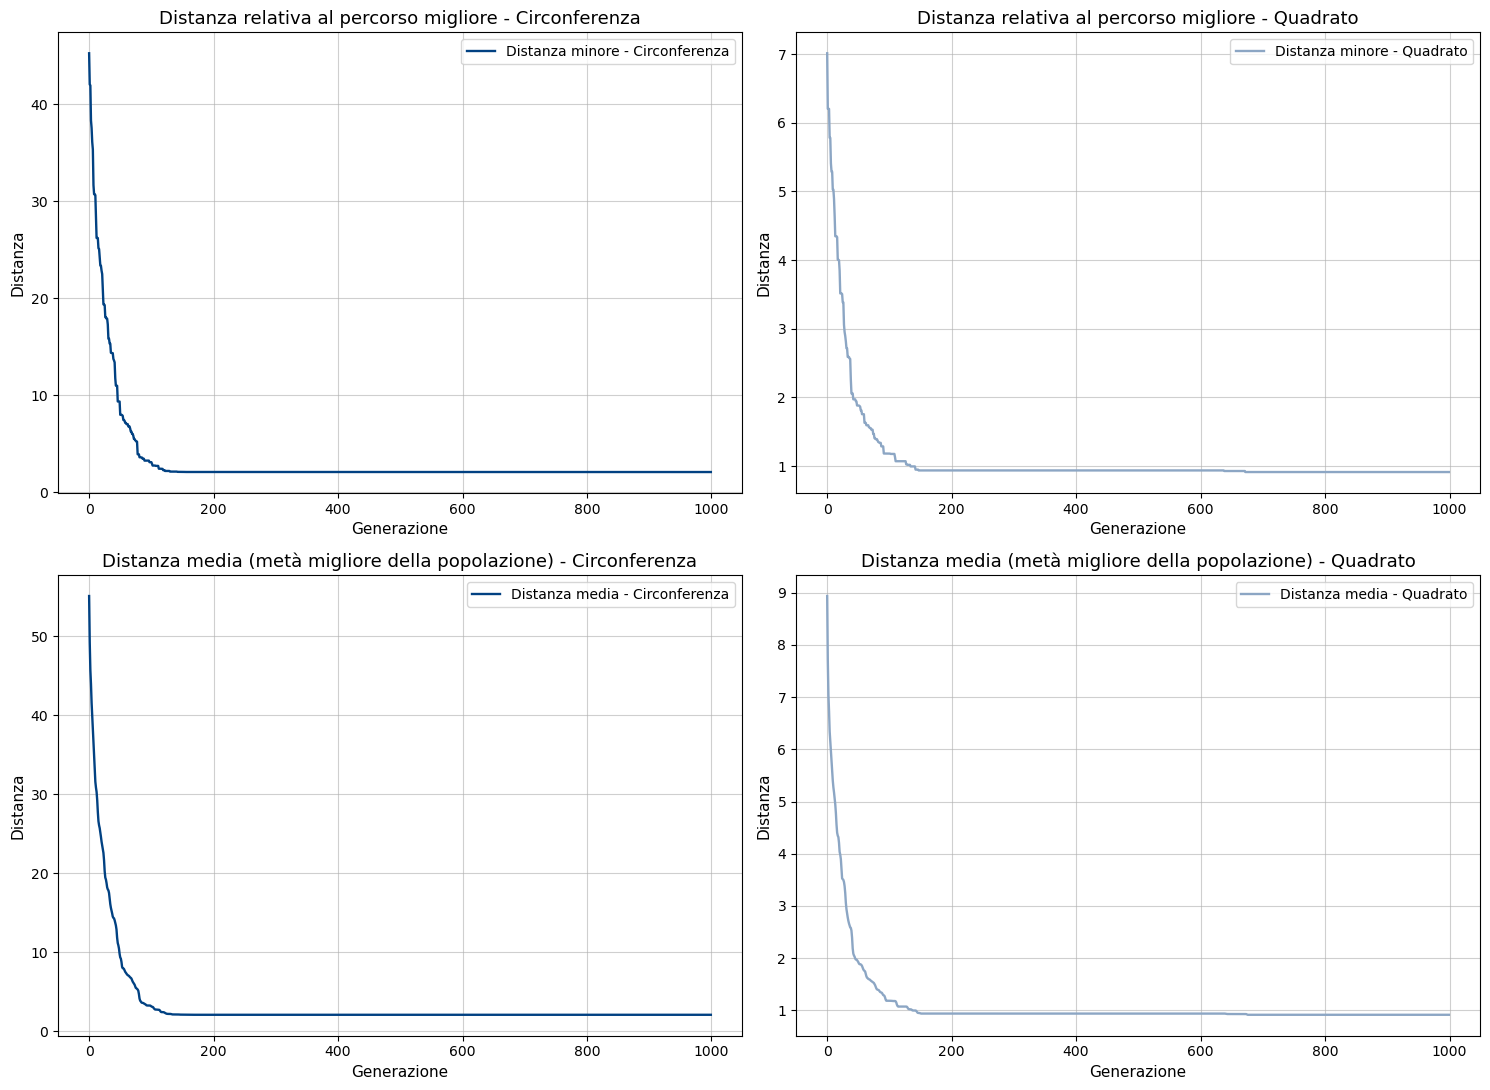

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

def read_distances(filename):
    with open(filename, "r") as f:
        return [float(line.strip()) for line in f]

best_circle = read_distances("best_path_c.dat")
best_square = read_distances("best_path_s.dat")
mean_circle = read_distances("mean_path_c.dat")
mean_square = read_distances("mean_path_s.dat")

gens = list(range(len(best_circle)))

fig, axs = plt.subplots(2, 2, figsize=(15, 11)) 
axs = axs.flatten()

axs[0].plot(gens, best_circle, color='xkcd:darkish blue', label='Distanza minore - Circonferenza', linewidth=1.7)
axs[0].set_title("Distanza relativa al percorso migliore - Circonferenza", fontsize=13)
axs[0].set_xlabel("Generazione", fontsize=11)
axs[0].set_ylabel("Distanza", fontsize=11)
axs[0].grid(True, alpha = 0.6)
axs[0].legend()

axs[1].plot(gens, best_square, color=(0.55, 0.65, 0.77), label='Distanza minore - Quadrato', linewidth=1.7)
axs[1].set_title("Distanza relativa al percorso migliore - Quadrato", fontsize=13)
axs[1].set_xlabel("Generazione", fontsize=11)
axs[1].set_ylabel("Distanza", fontsize=11)
axs[1].grid(True, alpha = 0.6)
axs[1].legend()

axs[2].plot(gens, mean_circle, color='xkcd:darkish blue', label='Distanza media - Circonferenza', linewidth=1.7)
axs[2].set_title("Distanza media (metà migliore della popolazione) - Circonferenza", fontsize=13)
axs[2].set_xlabel("Generazione", fontsize=11)
axs[2].set_ylabel("Distanza", fontsize=11)
axs[2].grid(True, alpha = 0.6)
axs[2].legend()

axs[3].plot(gens, mean_square, color=(0.55, 0.65, 0.77), label='Distanza media - Quadrato', linewidth=1.7)
axs[3].set_title("Distanza media (metà migliore della popolazione) - Quadrato", fontsize=13)
axs[3].set_xlabel("Generazione", fontsize=11)
axs[3].set_ylabel("Distanza", fontsize=11)
axs[3].grid(True, alpha = 0.6)
axs[3].legend()

plt.subplots_adjust(hspace=0.3, wspace=0.2)
plt.tight_layout()
plt.show()

Infine, si riporta il percorso relativo all'inidividuo migliore ottenuto nell'ultima generazione. Ciascun punto nel grafico rappresenta una città, con le corrispondenti coordinate $x$ e $y$. Nel caso in cui le città siano distribuite su una circonferenza, il risultato è coerente con quanto ci si aspetta: il percorso migliore è quello che collega in ordine le città adiacenti.
Dunque, si può ritenere che l'algoritmo funzioni correttamente: si giudicano affidabili anche i risultati ottenuti nel caso in cui le città sono distribuite casualmente all’interno di un quadrato.

In particolare:
- $L^{(2)}$ per il percorso migliore su circonferenza: 2.10096
- $L^{(2)}$ per il percorso migliore su quadrato: 0.913376

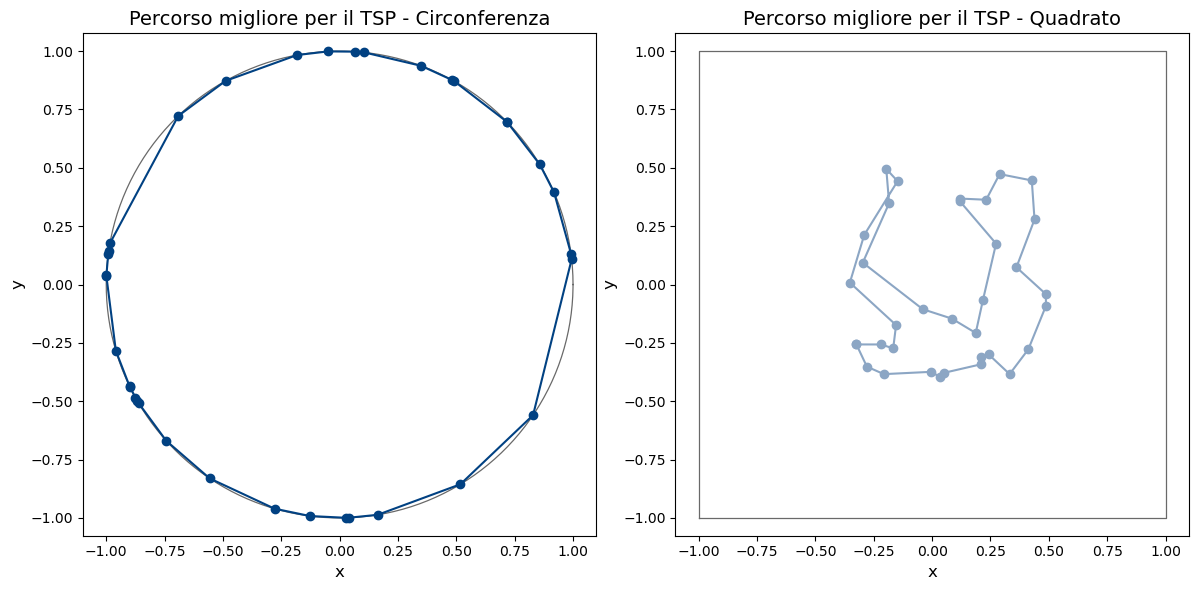

In [16]:
import matplotlib.pyplot as plt
import numpy as np

circle_cities = []
with open("best_path_circle.dat", "r") as f:
    for line in f:
        parts = line.strip().split()
        idx = int(parts[0])
        x = float(parts[1])
        y = float(parts[2])
        circle_cities.append((x, y))
circle_cities.append(circle_cities[0])
x_circle, y_circle = zip(*circle_cities)

square_cities = []
with open("best_path_square.dat", "r") as f:
    for line in f:
        parts = line.strip().split()
        idx = int(parts[0])
        x = float(parts[1])
        y = float(parts[2])
        square_cities.append((x, y))
square_cities.append(square_cities[0])
x_square, y_square = zip(*square_cities)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

theta = np.linspace(0, 2 * np.pi, 500)
circle_x = np.cos(theta)
circle_y = np.sin(theta)

axs[0].plot(circle_x, circle_y, color='dimgray', linewidth=0.9)  # sfondo circolare
axs[0].plot(x_circle, y_circle, 'o-', color='xkcd:darkish blue')
axs[0].set_title("Percorso migliore per il TSP - Circonferenza", fontsize=14)
axs[0].set_xlabel("x", fontsize=12)
axs[0].set_ylabel("y", fontsize=12)
axs[0].axis("equal")

square_x = [-1, 1, 1, -1, -1]
square_y = [-1, -1, 1, 1, -1]

axs[1].plot(square_x, square_y, color='dimgray', linewidth=0.9)  # sfondo quadrato
axs[1].plot(x_square, y_square, 'o-', color=(0.55, 0.65, 0.77), alpha = 1)
axs[1].set_title("Percorso migliore per il TSP - Quadrato", fontsize=14)
axs[1].set_xlabel("x", fontsize=12)
axs[1].set_ylabel("y", fontsize=12)
axs[1].axis("equal")

plt.tight_layout()
plt.show()